In [11]:
import numpy as np 
import scipy 
import matplotlib.pyplot as plt

# Вариант 24 
 ## $$ Ax = b $$ 
 ### $$ a_{ij} = \frac{159}{10c^{3}+c^{2}+25} \space $$
 ### $$ c=c_{ij}=0.1Nij \space \forall i, j=1..n $$
 ### $$ N=24 $$ 

In [12]:
def create_matrix(n=4):
    matrix = np.zeros([n, n], dtype = float)
    var=24
    for i in range(n):
        for j in range(n):
            c=0.1*var*(i+1)*(j+1)
            matrix[i][j] = 159/(10*c*c*c+c*c+25)
    
    b=np.zeros(n, dtype=float)
    for i in range(n):
        b[i]=var

    return matrix, b

In [13]:
matrix, b=create_matrix()


###  Матрица моего варианта: 

In [14]:
for i in range(len(matrix)):
    print("%.3f "*len(matrix[i]) % tuple(matrix[i]) )
 

0.941 0.138 0.042 0.018 
0.138 0.018 0.005 0.002 
0.042 0.005 0.002 0.001 
0.018 0.002 0.001 0.000 


### Вектор b моего варианта: 

In [15]:
print("%.3f "*len(b) % tuple(b) )

24.000 24.000 24.000 24.000 


# Реализация метода Гаусса 

Метод Гаусса - прямой метод решения системы линейных алгебраических уравнений. 

Сложность алгоритма: 
$$ Q \approx \frac{2}{3}m^3+m^2$$

## Прямой ход метода Гаусса

Матрица приводится к верхнетреугольному виду следующим образом. 

При k=0 $A^{(0)} = A, \space b^{(0)}=b$. 

На  k-ом шаге мы получаем матрицу $A^{(k)}$

Пусть на  k-ом шаге $ a_{kk} \neq  0$ (иначе нужно поменять k-ую строку со следующей нижней строкой, в которой k-ый элемент не равен нулю). Тогда 
$$ \mu_{ik} = \frac{a_{ik}^{(k-1)} }{a_{kk}^{(k-1)}} $$

$$ b_i^{(k)} = b_i^{(k-1)} - \mu_{ik} b_k^{(k-1)} $$ 

$$  a_{ij}^{(k)} =  a_{ij}^{(k-1)} - \mu_{ik} a_{ik}^{(k-1)} $$ 

### Функция для обработки одной строки матрицы: 

In [16]:
def gauss_step(A, b, step, k=-1):
    if(k==-1):
        k=step 
    temp_perm =np.zeros(len(b), dtype=float)
 
    if(abs(A[step][step])< np.finfo(float).eps): # это на случай, если нужно передвинуть строки 
         
        q=True
        currentstep=step+1
        while(q ):
            if(A[currentstep][currentstep] >  np.finfo(float).eps ):
                temp_perm = A[step]
                A[step]=A[currentstep]
                A[currentstep]=temp_perm
                temp_perm = b [step]
                b[step] = b[currentstep]
                b[currentstep] = temp_perm
                break 
                
            
            currentstep = currentstep+1
            if(currentstep==len(b)):
                
                return A
               
    else:
 
        A_n=A.copy()
        b_n=b.copy()
        
        for i in range(step+1, len(b)):
          
            nu = A[i][step]/A[step][step]
         
            for j in range (step, len(b)): # 
                A_n[i][j]=A[i][j]-nu*A[step][j]
                #print("aig", A_n[i][j])
            b_n[i]=b[i]- nu*b[step]
                
 
        return A_n.copy(), b_n.copy()
                
    
    

### Функция, приводящая матрица к верхнетреугольному виду 

In [17]:
def Gauss_elimination(A, b):
    x=np.zeros(len(b), dtype = float)
    An=A.copy()
    bn=b.copy()
    
    for i in range(len(b)-1):

        An1, bn1 = gauss_step(An, bn, i,i)
        An=An1.copy()
        bn=bn1.copy()
        

    return An, bn 

In [20]:
Gauss_A, Gauss_b = Gauss_elimination(matrix, b)

#### Полученная треугольна матрица методом Гаусса: 

In [24]:
for i in range(len(Gauss_A)):
    print("%.3f "*len(Gauss_A[i]) % tuple(Gauss_A[i]) )
 

0.941 0.138 0.042 0.018 
0.000 -0.002 -0.001 -0.000 
0.000 0.000 -0.000 -0.000 
0.000 -0.000 0.000 0.000 


#### Вектор b: 

In [25]:
print("%.3f "*len(Gauss_b) % tuple(Gauss_b) )

24.000 20.485 15.982 5.579 


### Обратный ход метода Гаусса: 

### Решение системы Ax = b



k-ая компонента искомого вектора х находится следующим образом: 

$$x_k = \frac{b_k^{(k-1)} - a_{k k+1}^{(k-1)}x_{k+1} - ... - a_{k n}^{(k-1)}x_{n}  }{a_{kk}^{(k-1)}} $$
 
В моем варианте n=4.

In [26]:
def Gauss_backward(Gauss_A, Gauss_b):
    
    x= Gauss_b
    
    for i in range(len(Gauss_b)-1, -1, -1 ):
 
        for j in range(  len(Gauss_b)-1, i, -1    ):
            x[i] = x[i] - Gauss_A[i][j]*x[j]
    
        x[i]=x[i]/Gauss_A[i][i]
    
    return x 
    
    

In [27]:
def solve_system(A, b):
    
    Gauss_A, Gauss_b = Gauss_elimination(A, b)
    x = Gauss_backward( Gauss_A, Gauss_b)
    
    return x 

In [28]:
x = solve_system(matrix, b)

### Найденное решение системы Ax = b:

In [29]:
print("%.3f "*len(x) % tuple(x) )

-823194.383 61391353.075 -285117087.073 237719107.300 


### Решение с помощью linalg.solve

In [30]:
x_np = np.linalg.solve(matrix, b)
print("%.3f "*len(x_np) % tuple(x_np) )

-823194.383 61391353.075 -285117087.076 237719107.303 


Так как в третьем задании Используется $ || (.) ||_{\infty} $, то и для поиска норм векторов здесь используется inf. 

Абсолютная погрешность для вектора решений:
$$ \Delta x=||x_{from linalg}-x_{gauss}||_{\infty} $$

In [43]:
abs_error  =   np.linalg.norm(x_np-x, np.inf)
print("Абсолютная погрешность: ", abs_error)

Абсолютная погрешность:  0.0027724802494049072


Относительная погрешность для вектора решений: 
 $$ \delta( x) = \frac{||x_{from linalg}-x_{gauss}||_{\infty} }{ || x_{from linalg}||_{\infty}  } $$

In [44]:
relative_error  =   np.linalg.norm( x_np - x, np.inf)/ np.linalg.norm(x_np, np.inf)
print("Относительная погрешность: ", relative_error)

Относительная погрешность:  9.72400594380561e-12


Решение, найденное моей программой, соответствует решению, найденному с помощью готового пакета. 


### Поиск числа обусловленности матрицы А.


$$cond(A) =  || A ||  ||A^{-1}|| $$ 

Так как в третьем задании Используется $ || (.) ||_{\infty} $, то и для поиска числа обусловленности матрицы используется inf. 


Пусть x - вектор размерности n.

$ ||x||_{\infty} = \max|x_i| $, Где $x_i$ - i-ая компонента вектора x. 

Данной норме вектора соответствует следующая норма для матриц: 

$ ||A||_{\infty} = \max_{1<=i<=n} \sum_{j=1}^{m} |a_{ij}|$

In [231]:
cond_number = np.linalg.cond( matrix, np.inf)
print("Число обусловленности: ")
print(cond_number)

Число обусловленности: 
102021295.13061807


Число обусловленности измеряет, насколько может измениться выходное значение функции при небольшом изменении входного аргумента. 
В данном случае матрица плохо обусловлена. Это значит, что при небольшом изменении входных данных (вектора b), выходные данные ( решение системы - вектор х) будет сильно отличаться от решения истинной системы.


### Находим вектор d 

In [39]:
print("Найденный ранее вектор решений, который теперь принимаем за точный:")
print("%.3f "*len(x) % tuple(x) )

Найденный ранее вектор решений, который теперь принимаем за точный:
-823194.383 61391353.075 -285117087.073 237719107.300 


In [42]:
d = []
delta = 0.01 # произвольная величина погрешности 
x_norm =   np.linalg.norm(x, np.inf)
for i in range(len(b)):
    b_i = b.copy()
    b_i[i] = b_i[i]+delta
    x_i = solve_system(matrix, b_i)
    print("Вектор решений при изменении ", i+1, "-ой компоненты вектора b", sep="")
    print("%.3f "*len(x_i) % tuple(x_i) )
    
    x_diff_norm = np.linalg.norm(x-x_i, np.inf)
    print("Абсолютная погрешность: ", x_diff_norm)
    d.append( x_diff_norm/x_norm  )
    
    
print("Вектор d:")
print(d)

Вектор решений при изменении 1-ой компоненты вектора b
-823193.806 61391278.899 -285116484.399 237718235.227 
Абсолютная погрешность:  872.0731736123562
Вектор решений при изменении 2-ой компоненты вектора b
-823268.558 61398827.725 -285170519.946 237790719.427 
Абсолютная погрешность:  71612.12769129872
Вектор решений при изменении 3-ой компоненты вектора b
-822591.708 61337920.202 -284785240.220 237321291.858 
Абсолютная погрешность:  397815.441994071
Вектор решений при изменении 4-ой компоненты вектора b
-824066.456 61462965.202 -285514902.515 238145232.315 
Абсолютная погрешность:  426125.01551789045
Вектор d:
[3.0586492818219067e-06, 0.00025116743589924146, 0.0013952704346042613, 0.001494561479607561]


При небольшом изменении входных данных (изменений одной компоненты на 0.01) получили достаточные изменения в векторах решений. Причина -  матрица А плохо обусловлена. 


### Гистрограмма вектора d:


<BarContainer object of 4 artists>

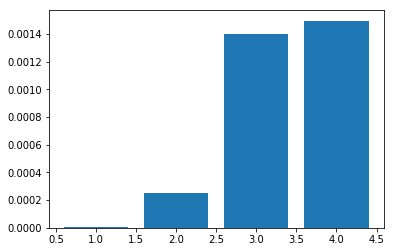

In [233]:
plt.bar([1,2,3,4 ],d)

Наибольшее влияние на погрешность решения оказывает четвертая компонента вектора b. (С учетом индексации номер компоненты 3).

In [234]:
b_norm = np.linalg.norm(b, np.inf)

b_3 = b.copy()
b_3[3] = b_3[3]+delta 

b_3_abs =  np.linalg.norm(b_3-b, np.inf)

relative_b = b_3_abs/b_norm

print("Относительная погрешность b: ")
print(relative_b)

Относительная погрешность b: 
0.0004166666666667318


Найдем: $$ cond(A)\delta(b^m) $$ 

In [235]:
cond_number*relative_b

42508.8729710975

Получаем следующее: 
    $$ \delta( x^m) <= cond(A)\delta(b^m) $$ 
    
Для m=4:
    $$ \delta( x^4) <= 42508.87297  $$ 
    
$d_4 =  0.00149456  \implies d_4 <=  42508.87297  $ 
$$ d_4 <= cond(A)\delta(b^4)  $$

Практическая погрешность меньше возможной теоретической. 